In [1]:
# Install required libraries (if not already)
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
# Example dataset URL (you can replace with your own CSV file path)
url = "/content/student-mat.csv"
df = pd.read_csv(url,sep=';')

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Basic info
print("Shape of Dataset:", df.shape)
print("\nColumns:\n", df.columns)
df.info()

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handling missing values
df = df.fillna(df.mean(numeric_only=True))

# Removing duplicates
df.drop_duplicates(inplace=True)

# Encoding categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Target variable (e.g., G3 as Final Grade)
X = df.drop('G3', axis=1)
y = df['G3']

# Classification Target: Pass (>=10) / Fail (<10)
y = (y >= 10).astype(int)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain Size:", X_train.shape)
print("Test Size:", X_test.shape)


Shape of Dataset: (395, 33)

Columns:
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null  

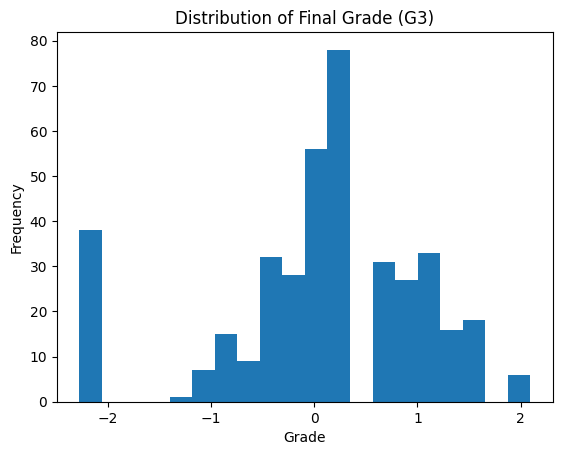

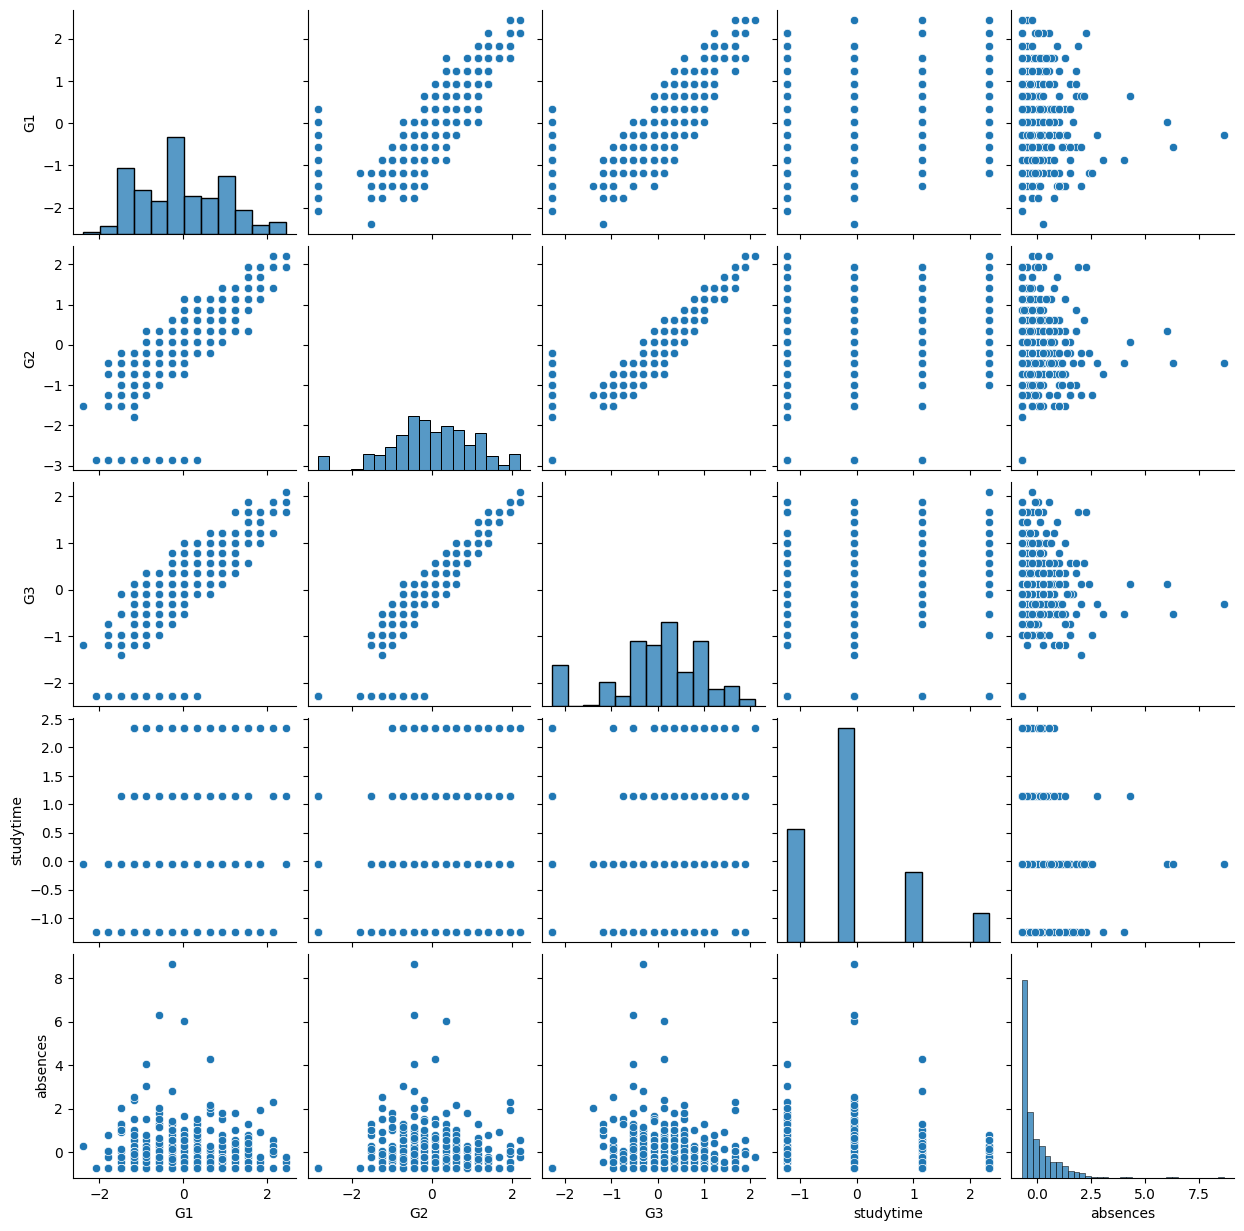

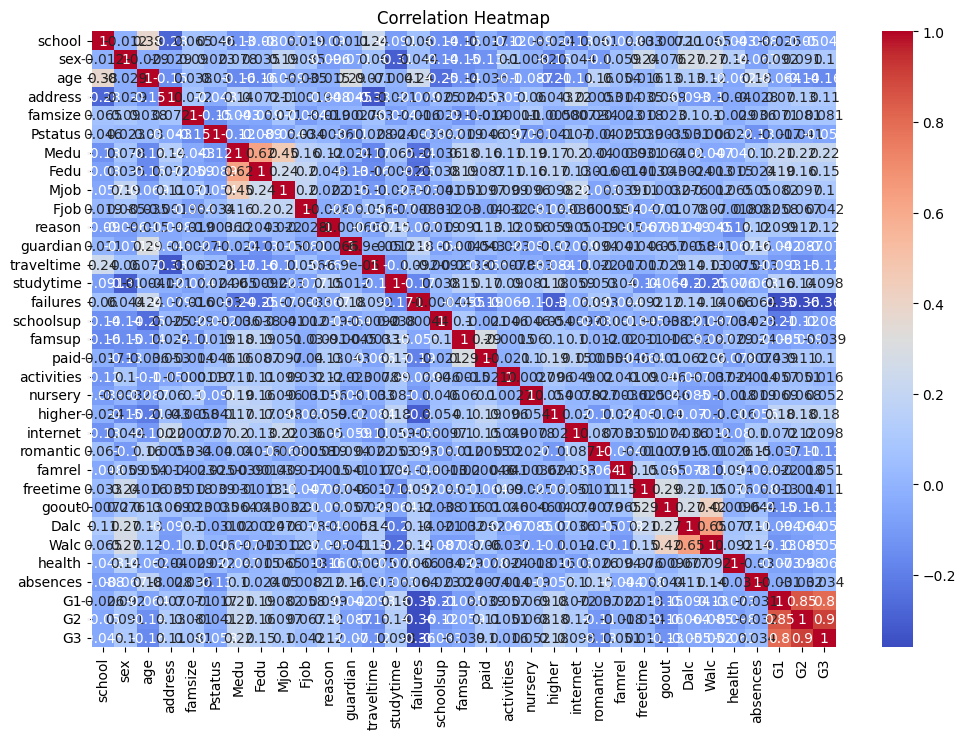

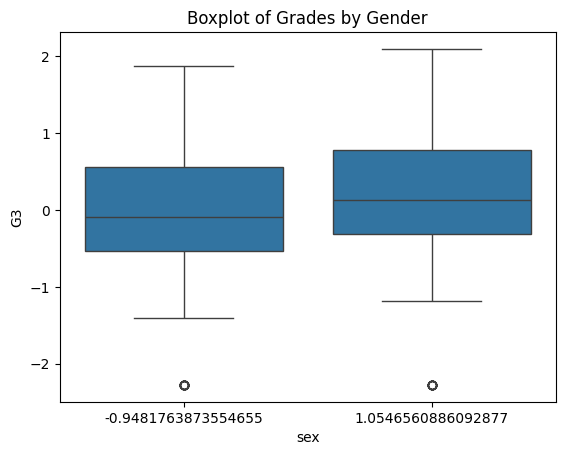

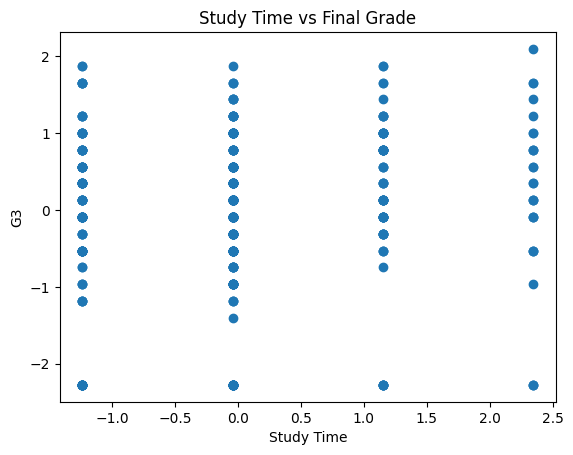

In [7]:
# 1. Histogram of Final Grade
plt.hist(df['G3'], bins=20)
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

# 2. Pairplot for selected features
sns.pairplot(df[['G1','G2','G3','studytime','absences']])
plt.show()

# 3. Heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Boxplot by gender vs grades
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Boxplot of Grades by Gender')
plt.show()

# 5. Scatter plot: Study time vs Final Grade
plt.scatter(df['studytime'], df['G3'])
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('G3')
plt.show()


In [8]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5119 - loss: 0.6833 - val_accuracy: 0.9688 - val_loss: 0.4702
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9613 - loss: 0.4358 - val_accuracy: 1.0000 - val_loss: 0.2982
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.2739 - val_accuracy: 1.0000 - val_loss: 0.1901
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.1775 - val_accuracy: 1.0000 - val_loss: 0.1214
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1112 - val_accuracy: 1.0000 - val_loss: 0.0786
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0728 - val_accuracy: 1.0000 - val_loss: 0.0526
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0502 - val_accuracy: 1.0000 - val_loss: 0.0368
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0334 - val_accuracy: 1.0000 - val_loss: 0.0270
Epoch 9/50
8/8 

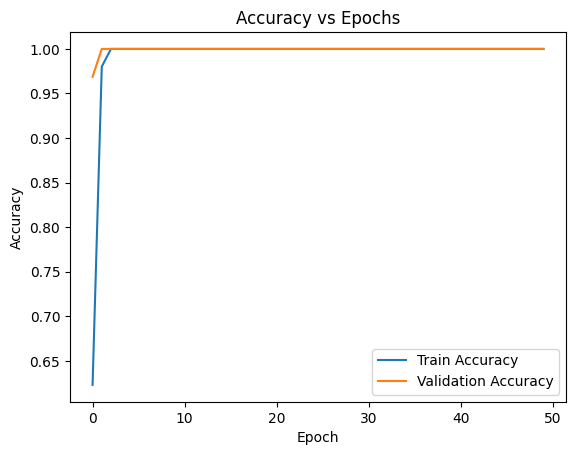

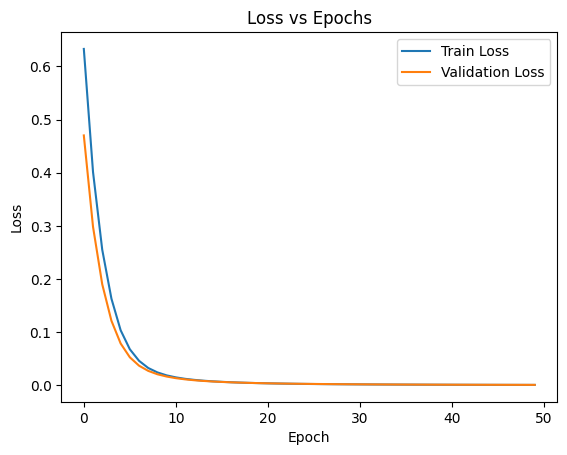

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


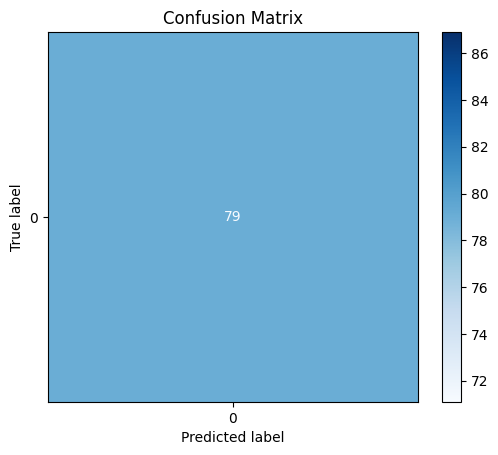

Test Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


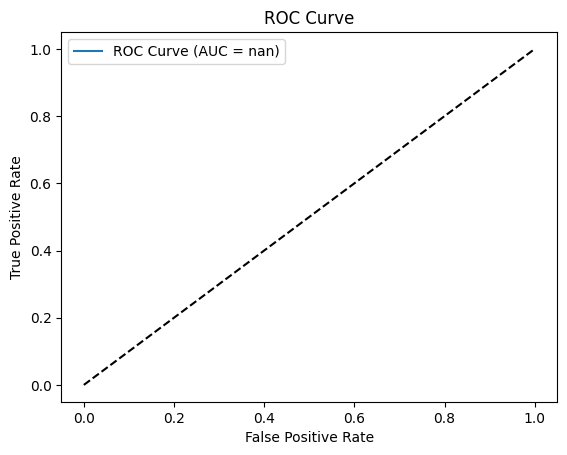

In [22]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Test Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

